In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### **Que-1**

We use the following equation to solve the linear regression model

given X,y we write the optimization problem as 

\begin{align}
\min_{\beta} \frac{1}{2} ||X\beta - y||^2\\
\beta^* = (X^TX)^{-1}X^Ty
\end{align}

for polynomial regression, same formula will hold, just we change $X$ according to the polynomial equation

In [70]:
def read_regression_file(fn):
    with open(fn, 'r') as f:
        nf, ny = list(map(lambda x: int(x), f.readline().split(" ")))
        dv = []
        for dl in f.readlines()[1:]:
            dl = dl.replace("\n", "").split(",")
            fdl = [float(i) for i in dl]
            dv.append(fdl)
        dv = np.array(dv)
        x, y = dv[:, :nf], dv[:, -ny:]
        return x, y 

def get_weights(X, y):
    nx = X.shape[0]
    oa = np.ones((nx, 1))
    nX = np.concatenate([oa,X], axis = 1)
    wt = np.dot(np.linalg.inv(np.dot(nX.T, nX)), np.dot(nX.T, y))
    return wt

def call_LinReg(x, y):
    wt = get_weights(x,y)
    return wt

def call_PolyLinReg(polynomial, x, y):
    px = polynomial(x[:,0:1], x[:,1:])
    wt = get_weights(px, y)
    return wt    

def train_test_split(x,y, split = 0.85):
    np = x.shape[0]
    npoints = int(split * np)
    return x[:npoints], y[:npoints], x[npoints+1:], y[npoints+1:]

def test_linreg(wts, x):
    xshp = x.shape[0]
    nx = np.concatenate([np.ones((xshp,1)), x], axis=1)
    return nx @ wts

def test_polylinreg(poly, wts, x):
    px = poly(x[:,0:1], x[:,1:])
    npx = np.concatenate([np.ones((px.shape[0],1)), px], axis=1)
    return npx @ wts

p1 = lambda x1, x2: np.concatenate([x1, x2, x1**2, x2**2], axis=1)
p2 = lambda x1, x2: np.concatenate([x1*x2, x1**2, x2**2], axis=1)
p3 = lambda x1, x2: np.concatenate([x1*x2**2, x1**3, x2**2, x1], axis=1)
p4 = lambda x1, x2: np.concatenate([x1*x2, x1**3, x2**3, x1**2, x2**2], axis=1)

file = "lin_regression/regression_data_039.txt"
polyfile = "poly_regression/poly_regression_data_039.txt"

x, y = read_regression_file(file)
px, py = read_regression_file(polyfile)

split = 0.85

trnx, trny, tstx, tsty = train_test_split(x,y, split)
ptrnx, ptrny, ptstx, ptsty = train_test_split(px,py, split)

weights_LR = call_LinReg(trnx, trny)
weights_PLR1 = call_PolyLinReg(p1, ptrnx, ptrny)
weights_PLR2 = call_PolyLinReg(p2, ptrnx, ptrny)
weights_PLR3 = call_PolyLinReg(p3, ptrnx, ptrny)
weights_PLR4 = call_PolyLinReg(p4, ptrnx, ptrny)

test_y_LR = test_linreg(weights_LR, tstx)
test_y_PLR1 = test_polylinreg(p1, weights_PLR1, ptstx)
test_y_PLR2 = test_polylinreg(p2, weights_PLR2, ptstx)
test_y_PLR3 = test_polylinreg(p3, weights_PLR3, ptstx)
test_y_PLR4 = test_polylinreg(p4, weights_PLR4, ptstx)

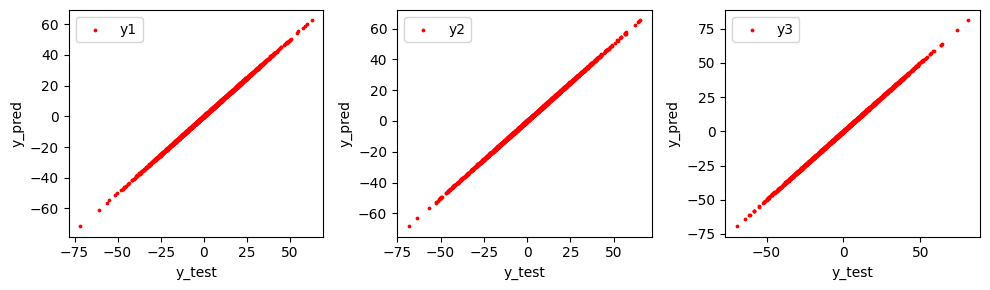

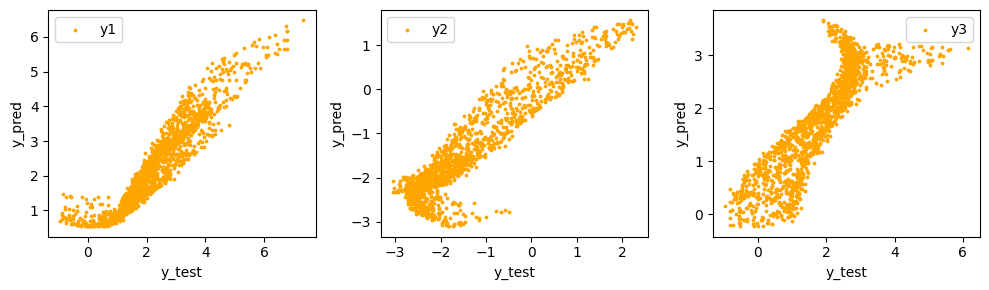

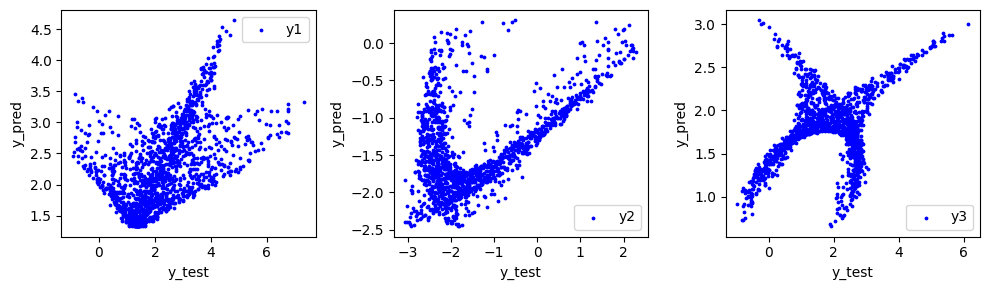

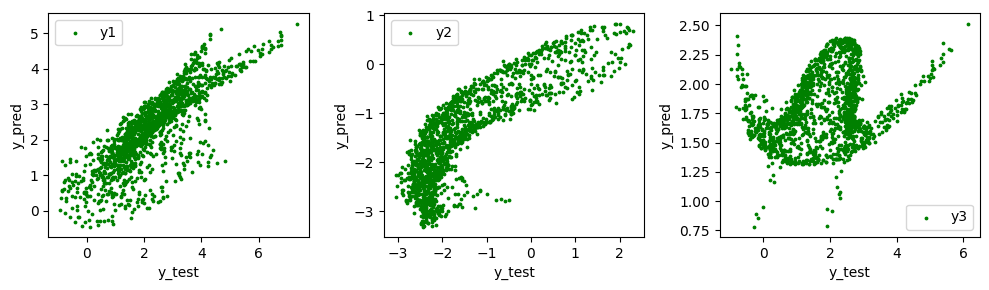

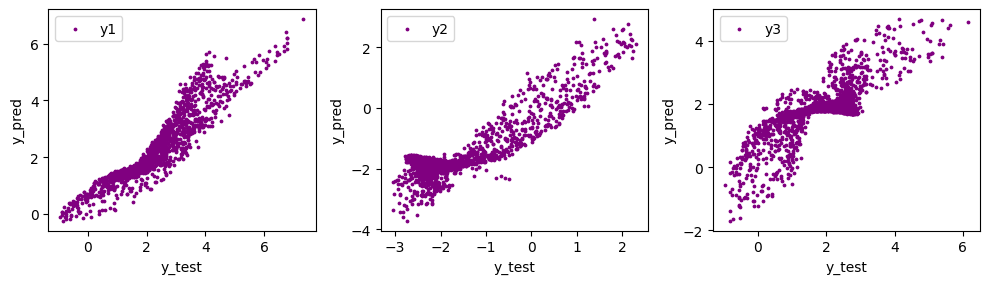

In [75]:
def MSE(x1,x2):
    return np.sum((x1-x2)**2, axis=0) / (x1.shape[0])

def MAE(x1,x2):
    return np.sum(np.abs(x1-x2), axis=0) / (x1.shape[0])

MSE_LR = MSE(test_y_LR, tsty)
MSE_PLR1 = MSE(test_y_PLR1, tsty)
MSE_PLR2 = MSE(test_y_PLR2, tsty)
MSE_PLR3 = MSE(test_y_PLR3, tsty)
MSE_PLR4 = MSE(test_y_PLR4, tsty)


MAE_LR = MAE(test_y_LR, tsty)
MAE_PLR1 = MAE(test_y_PLR1, tsty)
MAE_PLR2 = MAE(test_y_PLR2, tsty)
MAE_PLR3 = MAE(test_y_PLR3, tsty)
MAE_PLR4 = MAE(test_y_PLR4, tsty)


def plot_correlation_plots(tsty, test_y_LR, color='r'):
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))

    ax[0].scatter(tsty[:,0], test_y_LR[:,0], label='y1', s = 3, c = color)
    ax[1].scatter(tsty[:,1], test_y_LR[:,1], label='y2', s = 3, c = color)
    ax[2].scatter(tsty[:,2], test_y_LR[:,2], label='y3', s = 3, c = color)
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

    ax[0].set_xlabel("y_test")
    ax[0].set_ylabel("y_pred")

    ax[1].set_xlabel("y_test")
    ax[1].set_ylabel("y_pred")

    ax[2].set_xlabel("y_test")
    ax[2].set_ylabel("y_pred")
    fig.tight_layout()

    plt.show()

plot_correlation_plots(tsty, test_y_LR, color='red')
plot_correlation_plots(ptsty, test_y_PLR1, color='orange')
plot_correlation_plots(ptsty, test_y_PLR2, color='blue')
plot_correlation_plots(ptsty, test_y_PLR3, color='green')
plot_correlation_plots(ptsty, test_y_PLR4, color='purple')


In [71]:
print("MSE for Linear Regression for Y1, Y2, Y3")
print(MSE_LR)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P1")
print(MSE_PLR1)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P2")
print(MSE_PLR2)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P3")
print(MSE_PLR3)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P4")
print(MSE_PLR4)

print("***************************************")

print("MAE for Linear Regression for Y1, Y2, Y3")
print(MAE_LR)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P1")
print(MAE_PLR1)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P2")
print(MAE_PLR2)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P3")
print(MAE_PLR3)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P4")
print(MAE_PLR4)

MSE for Linear Regression for Y1, Y2, Y3
[0.03824399 0.04021738 0.0404512 ]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P1
[363.62589737 452.18499079 526.27995276]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P2
[361.70574214 451.67886702 526.48782026]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P3
[362.69652233 451.45592121 525.42194224]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P4
[363.50677534 451.81010393 526.07936421]
***************************************
MAE for Linear Regression for Y1, Y2, Y3
[0.15689249 0.15970043 0.16188441]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P1
[15.13821135 17.01292942 18.47093041]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P2
[15.11458943 16.98194784 18.50304632]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P3
[15.12205416 16.9975628  18.48022272]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P4
[15.14255767 17.00368477 18.48064047]


### **Regression with Linear Constraints**

\begin{align}
\min_{\beta} \frac{1}{2} ||X\beta - y||^2\\
A\beta = b\\
f(\beta) = \frac{1}{2} ||X\beta - y||^2 = \frac{1}{2} \beta X^TX \beta - y^TX \beta + \frac{1}{2} y^Ty\\
\nabla f(\beta) = X^TX \beta - X^Ty
\end{align}

we know that for minimization of such problems there exists a $\lambda$ such that $\nabla f(\beta^*) = A^T \lambda$, substituting $\nabla f(\beta^*)$, we get 

\begin{align}
\nabla f(\beta^*) = A^T \lambda \\
X^TX \beta^* - X^Ty = A^T \lambda\\
\end{align}

we also know that $\beta^*$ satisfies the constraint $A \beta^* = b$

solving both the equations we get

\begin{align}
X^TX \beta^* = A^T \lambda + X^Ty\\
\beta^* = (X^TX)^{-1}(A^T \lambda + X^Ty)\\
\end{align}

substituting it in $A \beta^* = b$ we get

\begin{align}
A(X^TX)^{-1}(A^T \lambda + X^Ty) = b\\
A(X^TX)^{-1}A^T \lambda + A(X^TX)^{-1}X^Ty = b\\
\lambda = (A(X^TX)^{-1}A^T)^{-1} (b - A(X^TX)^{-1}X^Ty)
\end{align}

hence once we get $\lambda$, we can get $\beta^*$ using the equation $\beta^* = (X^TX)^{-1}(A^T \lambda + X^Ty)$

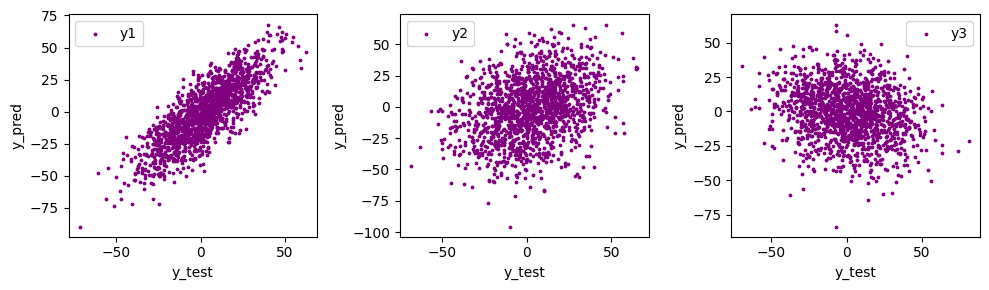

In [76]:
def read_constraints(file):
    A = []
    bs = []
    with open(file, 'r') as f:
        data = [int(i) for i in f.readline().split(' ')]
        for i in range(data[0]):
            a = [float(i) for i in f.readline().split(',')]
            A.append(a)
        for i in range(data[0]):
            b = float(f.readline())
            bs.append(b)
    return np.array(A), np.array(bs).reshape(-1,1)


A, b = read_constraints('constraints/constraints_039.txt')

def get_wts(X,y,A,b):
    xTxinv = np.linalg.inv(np.dot(X.T, X))
    lambd = np.dot(np.linalg.inv(A @ xTxinv @ A.T), b - np.dot((A @ xTxinv @ X.T), y))
    beta = xTxinv @ (A.T @ lambd + X.T @ y)
    return beta


wts_constr = get_wts(trnx, trny, A, b)
y_pred = tstx @ wts_constr


plot_correlation_plots(tsty, y_pred, color='purple')




### **Que-2**

PCA algorithm is as follows

\begin{align}
X = [x_1, x_2, x_3, ..., x_n] \\
X \in R^{n \times f}, x_i \in R^{n} \\
X = (X - \mu_x)\\
cov(X) = \frac{1}{n} X^TX
\end{align}

we use $X^TX$ in calculating the covariance matrix due to the structure of X

choose V to be eigen vectors corresponding to top $k$ eigen values
$$
V = [v_1, v_2, ..., v_k]; V \in R^{f \times k}
$$

we get the reduced data as 

$$
Y = XV
$$

and the reconstuction is given by

$$
Y^{'} = XVV^T
$$


In [73]:
def standardize_data(X):
    mu_x = np.mean(X, axis = 0)
    X = X - mu_x # centering data
    return X, mu_x

def get_CovMat(X):
    npX = X.shape[0]
    cov = np.dot(X.T, X) / (npX)
    return cov 

def compute_pca_eigen(X, n_components):
    cov_mat = get_CovMat(X) 
    eig_val, eig_vec = np.linalg.eigh(cov_mat) # eigh return eigenvalues in sorted order
    components = eig_vec.T[::-1][:n_components].T
    eig_val = eig_val / np.sum(eig_val)
    return components, eig_val[::-1][:n_components]

def PCA(X, n_comp):
    X, mu_x = standardize_data(X)
    components, variance_ratios = compute_pca_eigen(X, n_comp)
    return components, mu_x

def read_csv_mnist(file = 'dataset/MNIST_CSV/mnist_train.csv'):
    fdata = pd.read_csv(file)
    data = fdata.values
    x,y = data[:, 1:], data[:, 0]
    return x, y

def reconstruct_images(X, components, mean):
    X = X - mean
    return X @ components @ components.T

In [74]:
num_comp = [20,80,150,300,400,784]
transforms_mux = []
X, y = read_csv_mnist(file = 'dataset/MNIST_CSV/mnist_train.csv')
for n_comp in num_comp:
    transform, mu_x = PCA(X, n_comp=n_comp)
    transforms_mux.append((transform, mu_x))

In [40]:
outs = []
X_x, y_y = read_csv_mnist(file = "dataset/MNIST_CSV/mnist_test.csv")
for transform, mu_x in transforms_mux:
    out = reconstruct_images(X_x, transform, mu_x)
    outs.append(out)

In [41]:
def get_index_class(classes, y):
    idxes = []
    for i in range(classes):
        idxes.append((np.where(y == i)[0][0], i))
    return idxes

def plot_row(ax, X, row, classes, img_size):
    for col in range(classes):
        cur_x = X[col].reshape(img_size)
        cur_x[cur_x < 0] = 0.0
        ax[row][col].imshow(cur_x, cmap='gray')
        ax[row][col].set_axis_off()

def get_sel_images(RX, idxes):
    RXF = []
    for idx, cls in idxes:
        RXF.append(RX[idx,:])
    return RXF

def plot_imgs(ax, RX, row, idxes, classes=10, img_size=(28,28)):
    RXF = get_sel_images(RX, idxes)
    plot_row(ax, RXF, row, classes, img_size)

def plot_images_pca(X_x, y_y, outs, num_comp, classes, img_size):
    idxes = get_index_class(10, y_y)
    fig,ax = plt.subplots(nrows = len(num_comp) + 1, ncols = classes, figsize=(10,8))
    row = 0
    plot_imgs(ax, X_x, row, idxes, classes=classes, img_size=img_size)
    row += 1
    for out in outs:
        plot_imgs(ax, out, row, idxes, classes=classes, img_size=img_size)
        row += 1

    for i in range(classes):
        ax[0][i].set_title(f"class: {i}")

    for i in range(1, len(num_comp)):
        ax[i][0].set_xlabel(f"NC: {num_comp[i]}")
    plt.show()

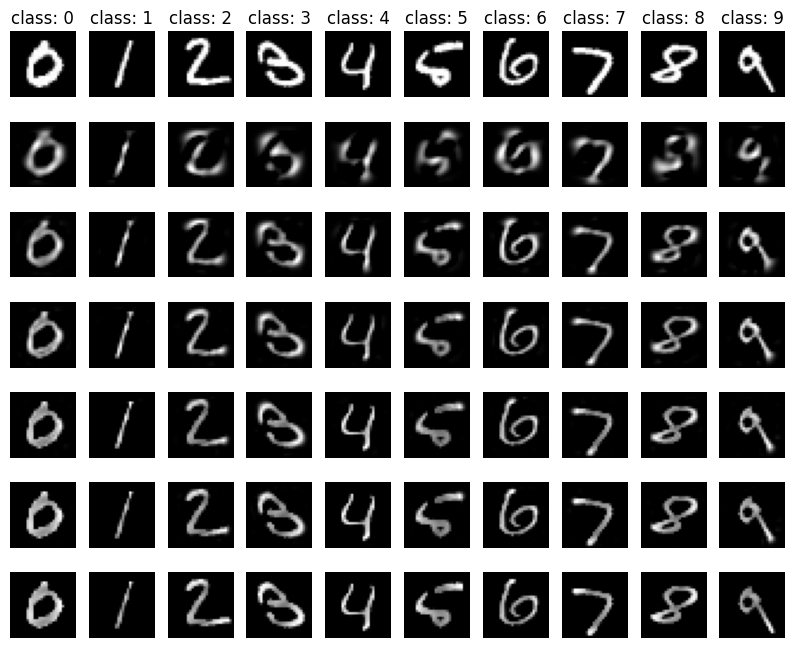

In [42]:
plot_images_pca(X_x, y_y, outs, num_comp, 10, (28,28))

### **Que-3**


1.0000000007012053 6


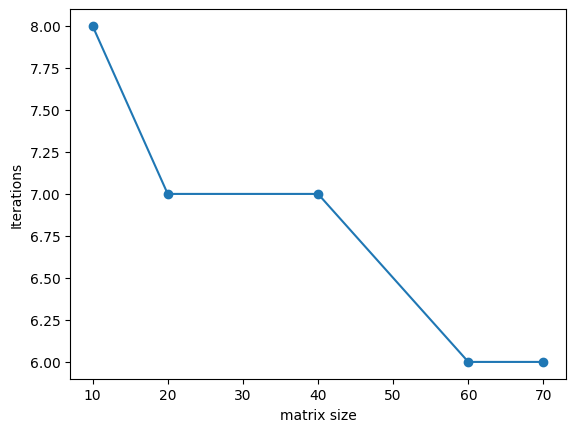

In [26]:
def load_TMat(file="transition_matrices/P_038.txt"):
    fd = []
    with open(file, 'r') as f:
        for line in f.readlines():
            fd.append(list(map(lambda x: float(x), line.replace("\n","").split(" "))))
    return np.array(fd)

def power_method(mat):
    piT = np.random.randn(1, mat.shape[0])
    piT = np.exp(piT)
    piT = piT / np.sum(piT)
    epsilon = 1e-6
    T = 0
    while True:
        T += 1
        opiT = piT
        piT = np.dot(piT, mat)
        if np.linalg.norm(piT - opiT) < epsilon:
            break 
    return piT, T 

def mat_variation(mat):
    size = [10, 20, 40, 60, 70]
    power_T = []
    for sz in size:
        nmat = mat[:sz, :sz]
        normal_mat = nmat / np.sum(nmat, axis=1).reshape(-1,1)
        piT, T = power_method(normal_mat)
        power_T.append(T)
    plt.plot(size, power_T, marker = "o")
    plt.xlabel("matrix size")
    plt.ylabel("Iterations")
    plt.show()

mat = load_TMat()
pi, T = power_method(mat)
print(pi.sum(), T)
mat_variation(mat)

### **Que-4**

In [51]:
import time

def read_matrix(file="OneDrive_1_30-10-2024/matrix_039.txt"):
    mat = []
    with open(file, 'r') as f:
        for line in f.readlines():
            line = list(map(
                lambda x: float(x), 
                line.replace("\n", "").replace("\t", " ").split(" ")
            ))
            mat.append(line)
    mat = np.array(mat)
    return mat 

def power_iteration(G, NIter):
    t1 = time.perf_counter()
    sigmas = []
    u = np.random.rand(G.shape[1])
    for i in range(NIter):
        Gu = np.dot(G,u)
        v = Gu / np.linalg.norm(Gu)
        GTv = np.dot(G.T, v)
        u = GTv / np.linalg.norm(GTv)
        sigma = np.dot(np.dot(G,u).T, v)
        sigmas.append(sigma)
    t2 = time.perf_counter()
    return sigmas, t2 - t1

def Gram_iteration(G, NIter):
    t1 = time.perf_counter()
    r = 0
    m,n = G.shape
    if n > m:
        G = G.T 
    sigmas = []
    for i in range(NIter):
        Gf = np.linalg.norm(G)
        r = 2 * (r + np.log(Gf))
        G = G / Gf 
        G = np.dot(G.T, G)
        sigma = (np.linalg.norm(G)**(- 2 * NIter)) * np.exp(2 ** (-NIter) * r)
        sigmas.append(sigma)
    t2 = time.perf_counter()
    return sigmas, t2 - t1 

In [52]:
matrix = read_matrix("OneDrive_1_30-10-2024/matrix_038.txt")

svdG = np.linalg.svd(matrix)

s_ref = svdG[1][0]

sigmas_power = []
sigmas_gramit = []

atp = 0 
atg = 0
N = 100

for i in range(N):
    sigmaps, timep = power_iteration(matrix, 2000)
    sigmags, timeg = Gram_iteration(matrix, 15)
    atp += timep / N
    atg += timeg / N 
    sigmas_power.append(sigmaps)
    sigmas_gramit.append(sigmags)

print(f"average time for power method: {atp:.3f}, gram iteration: {atg:.3f}") 


average time for power method: 1.380, gram iteration: 0.067


0.025957407546105052 0.34072973559035913
1.0400142043686592e+34 3.8903490089134453e+34


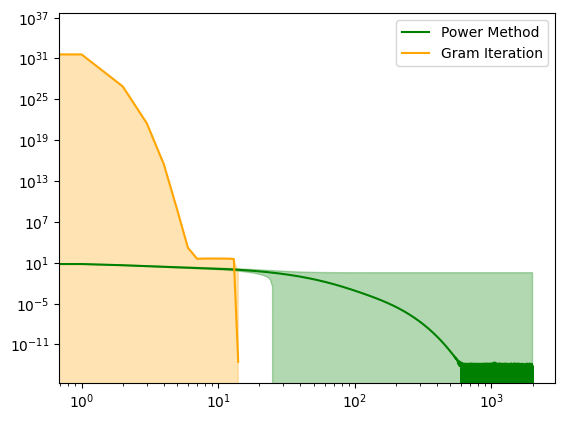

In [ ]:
def get_abs_diff(sigmas_power, sigmas_gramit, v, s_ref):
    p_iters = np.array(sigmas_power[v])
    g_iters = np.array(sigmas_gramit[v])

    p_iters = np.abs(s_ref - p_iters)
    g_iters = np.abs(s_ref - g_iters)
    return p_iters, g_iters

p_iters, g_iters = get_abs_diff(sigmas_power, sigmas_gramit, 2, s_ref)

# need to do this dude

print(up, stdp)
print(ug, stdg)

iter_p = [i for i in range(len(p_iters))]
iter_g = [i for i in range(len(g_iters))]
plt.plot(iter_p, p_iters, label="Power Method", color = 'green')
plt.plot(iter_g, g_iters, label='Gram Iteration', color = 'orange')

pp = np.linspace(up - stdp, up + stdp, len(iter_p))

plt.fill_between(iter_p, , p_iters + stdp, color = 'green', alpha = 0.3)
plt.fill_between(iter_g, g_iters - stdg, g_iters + stdp, color = 'orange', alpha = 0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

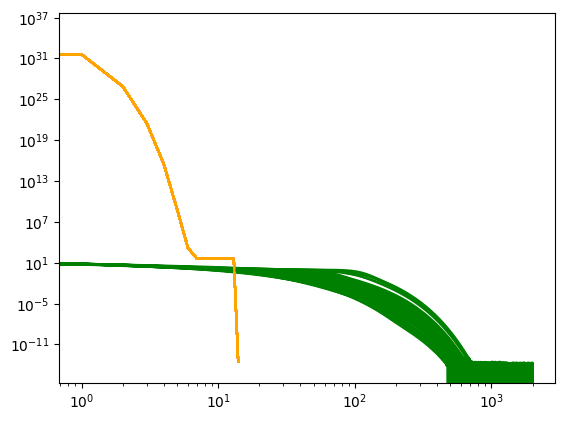

In [88]:
for i in range(100):
    p_iters, g_iters = get_abs_diff(sigmas_power, sigmas_gramit, i, s_ref)
    plt.plot([j for j in range(len(p_iters))], p_iters, color="green", label = "Power Method")
    plt.plot([j for j in range(len(g_iters))], g_iters, color="orange", label="Gram Iteration")
plt.xscale("log")
plt.yscale("log")
plt.show()